In [5]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [6]:
ins=pd.read_csv('data/insurance.csv')

In [24]:
ins

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,2,2205.98080
1335,18,0,36.850,0,0,0,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


In [9]:
ins['smoker']=ins.smoker.replace({'no':0,'yes':1})
ins['sex']=ins.sex.replace({'female':0,'male':1})
ins['region']=ins.region.replace({'southeast':0,'southwest':1,'northeast':2,'northwest':3})

,missing_value,%
age,0,0.0
sex,0,0.0
bmi,0,0.0
children,0,0.0
smoker,0,0.0
region,0,0.0
charges,0,0.0


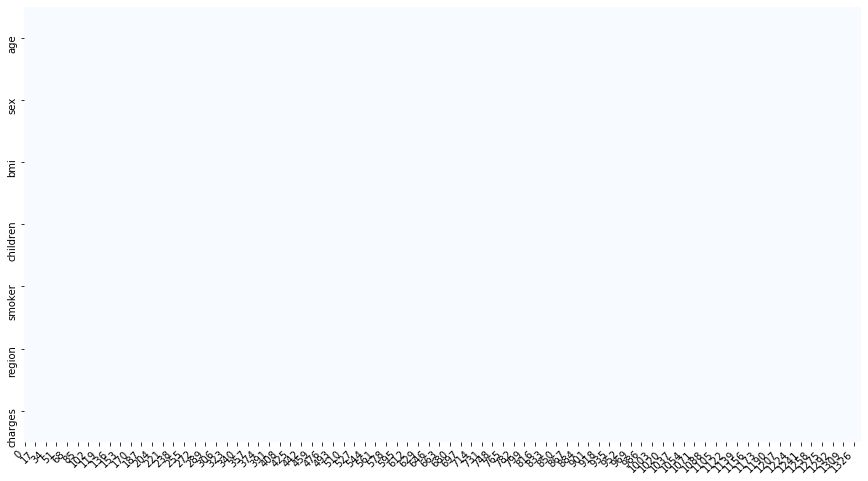

In [10]:
plot_missing_value(ins,return_df=True)

In [11]:
numeric_columns = ins.select_dtypes(include=['number']).columns

In [12]:
numeric_columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [13]:
ins.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [14]:
X = ins.drop(columns="charges")
y = ins['charges'] #target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

In [15]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['age', 'bmi', 'children']),
 ('categoric', cat_pipe(encoder="onehot"), ['sex', 'smoker', 'region']),
    
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LinearRegression())
])


model = RandomizedSearchCV(pipeline, rsp.linreg_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

D:\Anaconda\envs\jcopml\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 2 is smaller than n_iter=50. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 2 candidates, totalling 6 fits
{'algo__fit_intercept': False}
0.7417255854683333 0.7350447807051831 0.7835929767120722


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    2.2s finished


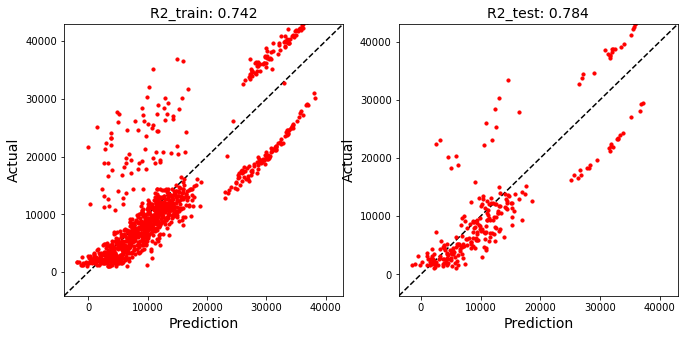

In [16]:
from jcopml.plot import plot_actual_vs_prediction,plot_residual
plot_actual_vs_prediction(X_train, y_train, X_test,y_test,model)

In [25]:
save_model(model, "alvido.pkl")

Model is pickled as model/alvido.pkl


In [26]:
save_model(model.best_estimator_, "alvido.pkl")

Model is pickled as model/alvido.pkl


In [27]:
df2 = ins

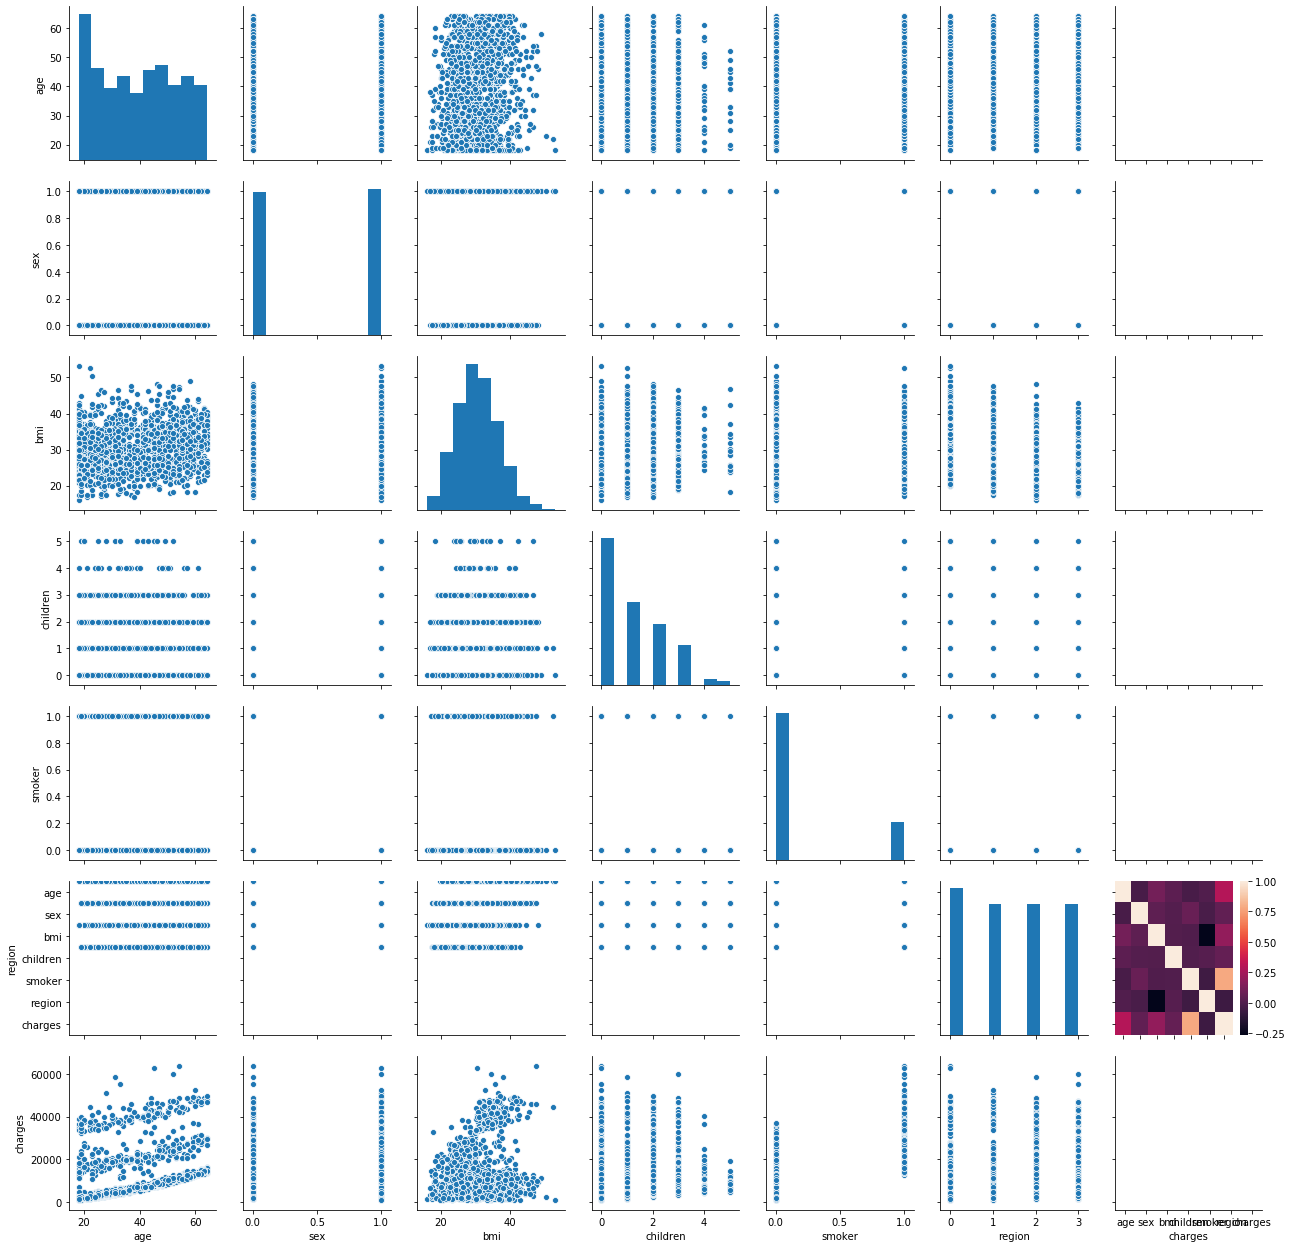

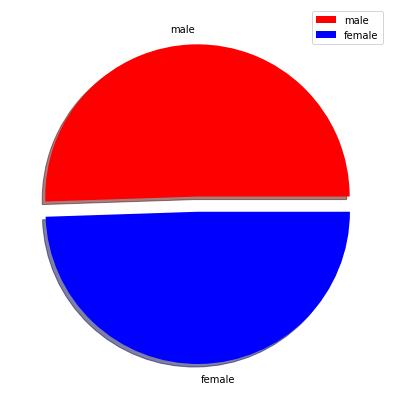

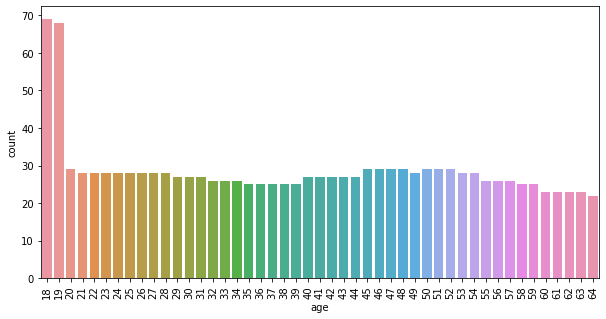

In [28]:
import seaborn as sns
df2.describe()
sns.pairplot(df2)
sns.heatmap(df2.corr())
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
size=df2['sex'].value_counts()
label=['male','female']
color=['Red','Blue']
explode=[0,0.1]
plt.pie(size,explode=explode,labels=label,colors=color,shadow=True)
plt.legend()
plt.show()
plt.figure(figsize=(10,5))
sns.countplot(df2['age'])
plt.xticks(rotation=90)
X = df2.drop(columns=['charges'], axis=1)
y = df2.charges
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data - 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
def result (y_pred_train, y_pred_test,y_train,y_test):
    print("train results")
    print("Mean absolute error =", round(sm.mean_absolute_error(y_train, y_pred_train), 2)) 
    print("Mean squared error =", round(sm.mean_squared_error(y_train, y_pred_train), 2)) 
    print("Median absolute error =", round(sm.median_absolute_error(y_train, y_pred_train), 2)) 
    print("Explain variance score =", round(sm.explained_variance_score(y_train, y_pred_train), 2)) 
    print("R2 score =", round(sm.r2_score(y_train, y_pred_train), 2))
    print("test results")
    print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_test), 2)) 
    print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_test), 2)) 
    print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_test), 2)) 
    print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_test), 2)) 
    print("R2 score =", round(sm.r2_score(y_test, y_pred_test), 2))

In [29]:
from sklearn import linear_model

lin_model = linear_model.LinearRegression()
lin_model.fit(X_train,y_train)
from sklearn import svm

svr_model = svm.SVR(gamma='scale')
svr_model.fit(X_train,y_train)
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100,random_state=1)
rf_model.fit(X_train, y_train)
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# Function to evaluate the models
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    r_score = 100*r2_score(test_labels,predictions)
    accuracy = 100 - mape
    print(model,'\n')
    print('Average Error       : {:0.4f} degrees'.format(np.mean(errors)))
    print('Variance score R^2  : {:0.2f}%' .format(r_score))
    print('Accuracy            : {:0.2f}%\n'.format(accuracy))

In [30]:
evaluate(lin_model, X_test, y_test)
evaluate(svr_model, X_test, y_test)
evaluate(rf_model, X_test, y_test)

evaluate(regressor, X_test, y_test)
cv = TimeSeriesSplit(n_splits = 10)

print('Linear Model:')
scores = cross_val_score(lin_model, X_train, y_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(lin_model, X_train, y_train, cv=cv,scoring='r2')
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))

print('SVR Model:')
scores = cross_val_score(svr_model, X_train, y_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(svr_model, X_train, y_train, cv=cv)
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))

print('Random Forest Model:')
scores = cross_val_score(rf_model, X_train, y_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(rf_model, X_train, y_train, cv=cv)
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 

Average Error       : 4030.1011 degrees
Variance score R^2  : 76.18%
Accuracy            : 59.86%

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) 

Average Error       : 8281.9824 degrees
Variance score R^2  : -11.57%
Accuracy            : -3.92%

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False) 

Average Error       : 2631.4459 degrees
Variance score R^2  : 85.10%
Acc

In [31]:
cv = TimeSeriesSplit(n_splits = 10)

print('Linear Model:')
scores = cross_val_score(lin_model, X_train, y_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(lin_model, X_train, y_train, cv=cv,scoring='r2')
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))

print('SVR Model:')
scores = cross_val_score(svr_model, X_train, y_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(svr_model, X_train, y_train, cv=cv)
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))
print('Random Forest Model:')
scores = cross_val_score(rf_model, X_train, y_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(rf_model, X_train, y_train, cv=cv)
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))
save_model(rf_model, "rf_model2.pkl")

Linear Model:
Accuracy: -4273.49 (+/- 836.65) degrees
R^2: 0.74 (+/- 0.07) degrees
SVR Model:
Accuracy: -8408.76 (+/- 1551.98) degrees
R^2: -0.11 (+/- 0.11) degrees
Random Forest Model:
Accuracy: -2777.53 (+/- 539.02) degrees
R^2: 0.82 (+/- 0.07) degrees
Model is pickled as model/rf_model2.pkl
